In [1]:
import os 
import pandas as pd

In [2]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports")

afri_chrom_1_filtered = pd.read_csv('S_XY_filtered2.csv')
afri_chrom_1_full = pd.read_csv('S_XY_full2.csv')



os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports")

eu_chrom_1_filtered = pd.read_csv('S_XY_filtered2.csv')
eu_chrom_1_full = pd.read_csv('S_XY_full2.csv')


In [3]:
snp_index_fil_1 = eu_chrom_1_filtered.hm_rsid
snp_index_fil_2 = afri_chrom_1_filtered.hm_rsid

snp_index_ful_1 = eu_chrom_1_full.hm_rsid
snp_index_ful_2 = afri_chrom_1_full.hm_rsid

In [4]:
l1 = list(set(snp_index_fil_1).intersection(snp_index_fil_2))
l2 = list(set(snp_index_ful_1).intersection(snp_index_ful_2))


In [6]:
eu_chrom_1_filtered.index = eu_chrom_1_filtered.hm_rsid
eu_chrom_1_full.index = eu_chrom_1_full.hm_rsid

os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European/Jupyter_Exports/META")

META_S_XY_filtered = eu_chrom_1_filtered.loc[l1].drop('hm_rsid',axis=1)
META_S_XY_full = eu_chrom_1_full.loc[l2].drop('hm_rsid',axis=1)

META_S_XY_filtered.to_csv('META_S_XY_filtered.csv')
META_S_XY_full.to_csv('META_S_XY_full.csv')

In [7]:
afri_chrom_1_filtered.index = afri_chrom_1_filtered.hm_rsid
afri_chrom_1_full.index = afri_chrom_1_full.hm_rsid

os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African/Jupyter_Exports/META")

META_S_XY_filtered = afri_chrom_1_filtered.loc[l1].drop('hm_rsid',axis=1)
META_S_XY_full = afri_chrom_1_full.loc[l2].drop('hm_rsid',axis=1)

META_S_XY_filtered.to_csv('META_S_XY_filtered.csv')
META_S_XY_full.to_csv('META_S_XY_full.csv')

In [8]:
META_S_XY_filtered.drop('hm_rsid',axis=1)

KeyError: "['hm_rsid'] not found in axis"

In [12]:
os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers")


results = pd.read_csv('Meta_Analysis/Meta_Results_Chrom_1.csv')

In [13]:
results.r_1

0     0.007124
1     0.008002
2     0.009949
3     0.008653
4     0.009817
        ...   
64    0.008415
65    0.008424
66    0.008754
67    0.008252
68    0.007470
Name: r_1, Length: 69, dtype: float64

In [17]:
#os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/European")
#data_euro_1 = pd.read_csv('34187551-GCST90014288-GO_0007568.h.tsv.gz', sep='\t')

os.chdir("/Volumes/Google Drive/My Drive/PROJECT/Data/Aging Biomarkers/African")
data1 = pd.read_csv('34187551-GCST90014294-GO_0007568.h.tsv.gz', sep='\t')


p_values = 10**(-results['-log10(p-val)'])
adjusted_p_values = p_values*len(data1)


In [19]:
import numpy as np
p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]

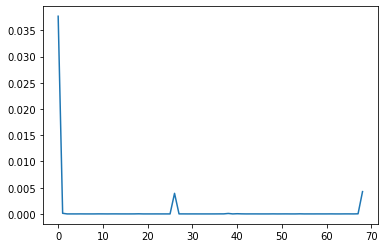

In [22]:
import matplotlib.pyplot as plt
plt.plot(p_values_corrected)